In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
plt.style.use('rose-pine-moon')
%matplotlib inline

### 1 Point Estimate

In most cases it is almost impossible to conduct trials on the entire population. So, in inferential statistics often trials are conducted on a subset of population or sample.

A single value from sample proportion used to approximate a population.

\begin{array}{c | c | c | c} 
\text{Unknown Population Parameter} & \text{Symbol} & \text{Empirical Point Estimator} & \text{Symbol}  \\ \hline
\text{Population Mean} & \mu & \text{Sample mean} & \bar{x} \\ \hline 
\text{Population standard deviation} & \sigma & \text{Sample standard deviation} & \bar s \\ \hline 
\text{Population proportion of success} & p & \text{Sample proportion of success} & \hat{p} \\ 
\end{array}

Population estimates are never perfect. They always have an error component commonly referred to as the "margin of error".

Technically, the error component is expressed as a confidence interval.

### 2. Sampling Distribution

#### 2.1. Sampling Distribution of the Sample Mean

Let $\bar{X}$, the mean of the measurements in a sample size *n*, the distribution of $\bar{X}$ is its **sampling distribution**<br>

The **standard error of the mean** is given as:<br>
$\sigma_{\bar{X}} = \frac{\sigma}{\sqrt{n}}$.

It measures how far is the mean of sampling distribution is away from population mean.

In real world scenario we do rarely know the population mean and standard deviation. So we calcuate the approximate standard error of the mean<br>
$\hat{\sigma}_{\bar{x}} = \frac{s}{\sqrt{n}}$

In [2]:
def get_random_samples(data, sample_size, num_samples):
    rng = np.random.default_rng()

    data = rng.permutation(data)
    samples = data.reshape(-1, sample_size)
    if num_samples is None:
        return samples
    else:
        return samples[:num_samples]

In [3]:
rng = np.random.default_rng()
data = rng.normal(loc=7, scale=1.5, size=(10000,))

samples = get_random_samples(data, 100, 10)

samples_mean  = np.mean(samples, axis=1)
standard_error = np.std(data) / samples.shape[0]**0.5

print(
    f'Mean of population: {np.mean(data):.4f}'
    f'\nMean of the sampling distribution: {np.mean(samples_mean):.4f}'
    f'\nStandard error of the mean: {standard_error:.4f}',
    f'\nStandard deviation of sampling distribution: {np.std(samples_mean):.4f}'
    )

Mean of population: 7.0073
Mean of the sampling distribution: 6.9748
Standard error of the mean: 0.4756 
Standard deviation of sampling distribution: 0.1200


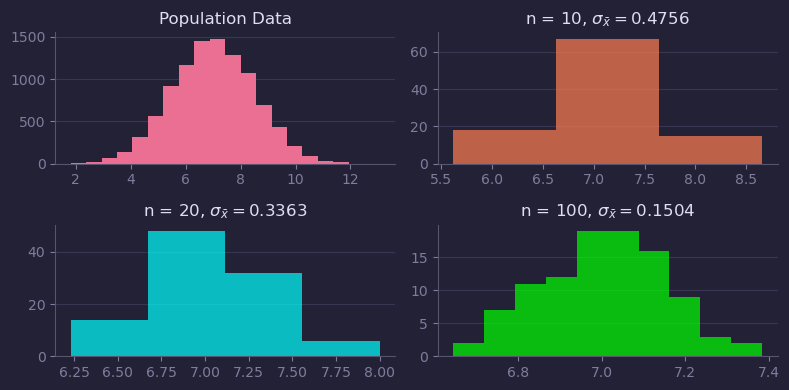

In [4]:
fig = plt.figure(figsize=(8,4), tight_layout=True)
ax = fig.add_subplot(2,2,1)
ax.hist(data, bins=20)
ax.set_title('Population Data')

colors = ['coral','cyan', 'lime']
for n, i in enumerate((10, 20, 100)):
    ax = fig.add_subplot(2,2,n+2)
    # samples = np.random.choice(data, size=(100, i))
    samples = get_random_samples(data, sample_size=i, num_samples=100)
    samples_mean  = np.mean(samples, axis=1)
    ax.hist(samples_mean,bins=int(np.round(i**0.5)), color=colors[n], alpha=0.7)
    ax.set_title(f'n = {i}, ' + r'$\sigma_{\bar{x}} =$'+f'{np.std(data)/i**0.5:.4f}')

**Observation**: 
- The *standard deviation of sampling distribution* **is not equal** to the *standard error of  the mean*. <br>
(In almost all introductory courses I found these two being defined the same, but if we run the above code several times, they are never equal!). 

- *Sample error of the mean* **is same** for all samples and doesn't depend on sample statistics. That is for computing sample error of the mean we only require one sample.

- *Increasing sample size* decreases standard error of mean as well as the standard deviation of sample means.

#### 2.2. The Sample Proportion

Often sampling is done in order to estimate the proportion of a poulation that has a specific characterstic, such as the proportion of all items coming off an assembly line that are defective or the proportion of all people entering a retail store who make a purchase before leaving.

The population proportion is denoted as $p$ and the sample proportion is denoted $\hat{p}$.Thus if in reality 43% of people entering a store make a purchase before leaving<br><br>
$p = 0.43$

The sample proportion is a random variable, it varies from  sample to sample in a way that cannot be predicted with certainly. It is written as $\hat{P}$. It has a mean $\mu_{\hat{P}}$ and a standard deviation $\sigma_{\hat{P}}$.

Suppose random samples of size n are drawn from a population in which the proportion with a characteristic of interest is *p*. Than the mean and standard deviation can be expressed as:<br><br>
$\mu_{\hat{P}} = p \qquad \text{and} \qquad \sigma_{\hat{P}} = \sqrt{\frac{p(1-p)}{n}}$

#### 2.3 Example

An online retailer claims that 90% of all orders are shipped within 12 hours of being received. A consumer group placed 121 orders of different sizes and at different times of day; 102 orders were shipped within 12 hours. Try to draw conclusion about the retailer's claim.

In [5]:
p, n = 0.9, 121
phat = 102/n

# calculating mean and std
mean = p
std = (p*(1-p)/n)**0.5

# calculating probability of orders being less than or equal to 102
# using z-score as we are using cdf of standard normal distribution
z_score = (phat-mean)/std
Pz = sc.stats.norm.cdf(z_score)

print(f'Likelihood of 102 orders being delievered based on claim made by retailer:\n{Pz*100:.4f}%')

Likelihood of 102 orders being delievered based on claim made by retailer:
1.8268%


So there is a 1.83% chance of 102 out of 121 orders being delieverd. This is highly unlikely and therefore the claim is false.

### 3. Confidence Intervals

##### 3.1.1. Confidence Intervals & Levels

- A confidence interval (CI) is a range of values that is likely to contain the value of an unknown population parameter. 
- Confidence intervals depends on the drawn random samples. If we sample alot of random samples, not all confidence interval might end up containing the parameter.
- The confidence level is the percentage on the intervals that contain the parameter.

Confidence level : $\alpha = 1 - \frac{CI}{100}$


##### 3.1.2. Interpretation

- A confidence interval indicates where the population parameter is likely to reside. 
- For example, a 95% confidence interval of the mean [9 11] suggests you can be 95% confident that the population mean is between 9 and 11.
- The width of the confidence interval around the point estimate reveals the precision. If the range is narrow, the margin of error is small.
- However, if the interval is wide, the margin of error is large and the estimate is imprecise.

##### 3.1.3. Misinterpretation

-  A frequent misuse is applying confidence intervals to the distribution of sample values.
- For example, a 95% confidence interval [10 15] indicates that we can be 95% confident that the parameter is within that range.
- However, it does NOT indicate that 95% of the sample values occur in that range.

##### 3.1.4. What Affects the Widths of Confidence Intervals?

1. **Sample Variablity**: Higher variablity makes the data more spread out allowing broader range for giving confident intervals.
2. **Sample Size**: Larger the data size tighter the confidence interval.

While **Confidence level** is a methodology choice it also affects the confidence interval. They have an inverse relationship. To illustrate that, if we are confident the correct answer lies between 15 and 20, then confidence level of the correct answer lying between 17 and 18 is obviously going to be smaller. Conversly the confidence level of correct answer lying between 10 and 30 will be larger.

### 4. Margin of Errors

#### 4.1. Introduction

Note:  [.ppf](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.ppf.html) refers to percent point funtion or the inverse of cdf.

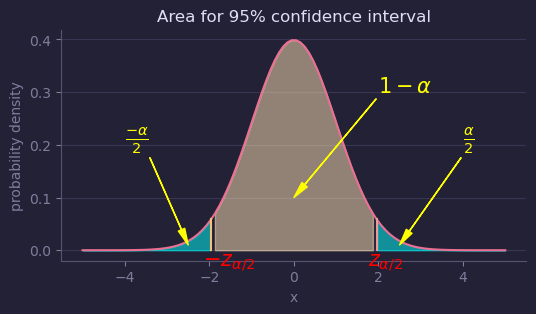

In [6]:
x = np.linspace(-5, 5, 100)
normal_dist = sc.stats.norm(0, 1)

ci = 0.95
alpha = 1-ci
z_scores = [normal_dist.ppf(alpha/2), normal_dist.ppf(1-alpha/2)]
fig = plt.figure(figsize=(6,3))
ax = fig.add_subplot(1,1,1)
ax.plot(x, normal_dist.pdf(x))

# region fills
for i in range(2):
    ax.plot([z_scores[i]]*2, [0,normal_dist.pdf(z_scores[i])])
    # for some reason using both conditions in np.where would cause inbetween region to be filled at interval pdf level
    if i == 0:
        z_range = x[np.where(x<z_scores[i])]
    elif i == 1:
        z_range = x[np.where(x>z_scores[i])]
    ax.fill_between(z_range, normal_dist.pdf(z_range), color='cyan', alpha=0.5)
    
z_range = x[np.where((x>z_scores[0])&(x<z_scores[1]))]   
ax.fill_between(z_range, normal_dist.pdf(z_range), color='moccasin', alpha=0.5)

# annotations
ax.annotate(r'$1-\alpha$', xy=(0, 0.1), xytext=(2, 0.3), fontsize = 15,color='yellow', arrowprops={'color':'yellow','width':0.2, 'headwidth': 5})
ax.annotate(r'$\frac{\alpha}{2}$', xy=(2.5, 0.01), xytext=(4, 0.2), fontsize = 15,color='yellow', arrowprops={'color':'yellow','width':0.2, 'headwidth': 5})
ax.annotate(r'$\frac{-\alpha}{2}$', xy=(-2.5, 0.01), xytext=(-4, 0.2), fontsize = 15,color='yellow', arrowprops={'color':'yellow','width':0.2, 'headwidth': 5})
ax.text(z_scores[0]-0.2,-0.03,r'$-z_{\alpha/2}$', fontsize=15, color='red')
ax.text(z_scores[1]-0.2,-0.03,r'$z_{\alpha/2}$', fontsize=15, color='red')

ax.set_xlabel('x')
ax.set_ylabel('probability density')
ax.set_title('Area for 95% confidence interval');

#### 4.2. Proportion Sample Success

**Critical z_value**: z-score corresponding to CI or $\alpha$. Since we are not using tables or calculators, we calculate using inverse cdf or probability point function. Still we will use the textbooks notation which generally use $Z_{\alpha/2}$ for corresponding z-score of confidence level.

**Margin of Error**: The maximum difference between $\hat{p}$ and $p$.
$$E = Z_{\alpha/2} \sqrt{\frac{\hat{p}(1-\hat{p})}{n}}$$

Than confidence interval CI for $p$ is 
$$\text{CI} = \hat{p} \pm E$$

**Example**: For a poll on whether a product was good or not, out of 1000 reviews 537 reviews said yes. Now we would like to know what would be the margin of error for a confidence interval of 95%.

**Solution**: sample proportion of success $\hat{p} = \frac{537}{1000}$ and n = 1000. Substitutting in above formula we get:

In [7]:
p = 537/1000
n = 1000
E = sc.stats.norm.ppf(0.975)*(p*(1-p)/n)**0.5
print(f'Margin of error : {E}\nRange of p: ({p-E:.4f},{p+E:.4f})')

Margin of error : 0.030904785196600237
Range of p: (0.5061,0.5679)


That is there is $\pm 2 \%$ of difference in $\hat{p}$ and $p$.

Note that increasing *n* decreases margin of error, narrowing out the range of our predictions.

##### 4.2.1. Finding Population size

In this section we try to find population size if we are given the margin of error.
$$n = \frac{(Z_{\alpha/2})^2 \cdot \hat{p}\cdot\hat{q}}{E^2}$$

**Exmaple**: A company is selling a product. The product has an approval of 90%. What should be the *sample size*, to ensure the *margin of error* is 4% for a *confidence interval* of 95%.

In [8]:
# CI for inverse CDF = 1 - alpha / 2 = 1 - 0.05/2 = 0.975
p, E, CI = 0.9, 0.04, 0.975
n = (sc.stats.norm.ppf(CI)**2 * p * (1-p))/E**2
print(f'Sample size required for {p*100}% approval: {np.ceil(n)}')

Sample size required for 90.0% approval: 217.0


Consider the case if the company did not know the approval rating. So we consider the naive scenario (the worst case scenario) of $\hat{p} = \hat{q} = 0.5$

In [9]:
p, E, CI = 0.5, 0.04, 0.975
n = (sc.stats.norm.ppf(CI)**2 * p * (1-p))/E**2
print(f'Sample size required for {p*100}% approval: {np.ceil(n)}')

Sample size required for 50.0% approval: 601.0


We try to visualize how the sample size varies with probability of success of sample.

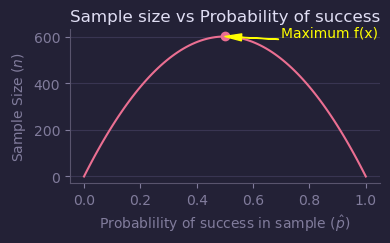

In [10]:
E, CI = 0.04, 0.975
p = np.linspace(0, 1, 100)
f = lambda p: (sc.stats.norm.ppf(CI)**2 * p * (1-p))/E**2

fig = plt.figure(figsize=(4,2))
ax = fig.add_subplot(1,1,1)
ax.plot(p, f(p))
ax.scatter(0.5, f(0.5))

ax.annotate('Maximum f(x)', xy=(0.5, f(0.5)), xytext=(0.7, f(0.5)), color='yellow', arrowprops={'color':'yellow','width':0.2, 'headwidth': 5})
ax.set_xlabel(r'Probablility of success in sample ($\hat{p}$)')
ax.set_ylabel('Sample Size ($n$)')
ax.set_title(r'Sample size vs Probability of success');

**Inference**: 
- Sample size for a given *margin of error and confidence interval* has a shape of concave parabola.<br><br>
$n = -k\hat{p}^2 + k\hat{p}$<br><br>
where $k = \left(\frac{Z_{\alpha/2}}{E} \right)^2$

- The maximum amount of sample size would be for $\hat{p} = 0.5$, thus the worst case scenario.
- Also increasing confidence interval increases the margin error and therefore the interval. (This makes sense, as we want to be more sure we would need to have a larger margin).

#### 4.3. Estimating Population Mean

##### 4.3.1.  Basic Requirements

Requirements for estimating population mean are:
1. Random Sample
2. Population standard deviation
2. Sample size greater than 30, or normally distributed data for n < 30.

##### 4.3.2. Margin of Error

Margin of error for sample mean $\bar{x}$ is given as
$$E = Z_{\alpha/2}\frac{\sigma}{\sqrt{n}}$$
than the interval in which population mean $\mu$ lie:
$$\bar{x} - E < \mu < \bar{x} + E$$

**Example**: For a random sample of 40 students the average resting hear rate for was 76.3 bpm. Assume the population standard deviation is 12.5 bpm. What would be the approximate population mean interval for a 99% confidence interval.

**Solution**: n > 30 and population standard deviation is given, so we can estimate population mean.

In [11]:
n, mean, std, CI = 40, 76.3, 12.5, 0.995
E = sc.stats.norm.ppf(CI)*std/n**0.5
print(f'Margin of error: {E}\nInterval of population mean: ({mean - E:4f}, {mean + E:.4f}) with a confidence of {CI*100}%')

Margin of error: 5.090929664387351
Interval of population mean: (71.209070, 81.3909) with a confidence of 99.5%


##### 4.2.3. Finding Sample Size

Given the margin of error of sample mean, we can get the sample size as:
$$n = \left[\frac{Z_{\alpha/2} \cdot \sigma}{E}\right]^2$$

**Example:** How many people need be to surveyed so the sample mean within 2 points, with a population standard deviation of 15 with 95% confidence.

In [12]:
E, std = 2, 15
Z = sc.stats.norm.ppf(0.95)
n = (Z*std/E)**2 
print(f'Number of people need to be surveyed: {np.ceil(n)}')

Number of people need to be surveyed: 153.0


##### 4.3.4. Population Standard deviation unknown

If standard deviation is unknown and sample size is small, we use t-score instead of z-score. It is the ratio of (difference in a number's estimated value from its assumed valute) to it standard error. 
$$t_{\hat{\beta}} = \frac{\hat{\beta} - \beta_0}{\text{s.e.}(\hat{\beta})}$$

where $\beta_0$ is a non-random, known constant, which may or may not match the actual unknown parameter value $\beta$, and $\text{s.e}(\hat{\beta})$ is the standard error of the estimator $\hat{\beta}$ for $\beta$. 

Degree of freedom = sample size - 1

In [13]:
alpha, n = 0.05, 22
t_score = sc.stats.t.ppf(1-alpha/2, n-1)
print(f'T-score for confidence interval 95% and sample size {n}: {t_score:.4f}')

T-score for confidence interval 95% and sample size 22: 2.0796


**Example**: Consider following statistics: sample size = 190, sample mean is 2700 and sample standard deviation is 645. Caculate the margin of error and 99% confidence interval.

In [14]:
n, mean, std, alpha = 190, 2700, 645, 1-0.99
t_score = sc.stats.t.ppf(1-alpha/2, n-1)
E = t_score * std / n**0.5
print(f'Margin of error: {E:.4f}\nConfidence interval: ({mean-E:.4f},{mean+E:.4f})')

Margin of error: 121.7603
Confidence interval: (2578.2397,2821.7603)


#### 4.4. Estimating population variance

Population variace can be calculated using chi-squared distribution as follows:
$$\frac{(n-1)s^2}{\chi_R^2} < \sigma^2 < \frac{(n-1)s^2}{\chi_L^2}$$
where, $\chi_L^2$ is the value of chi squared distribution at $\alpha/2$ <br>
while  $\chi_R^2$ is the value of chi squared distribution at $(1 - \alpha/2)$<br>
and degrees of freedom = n-1

**Example**: $s = 0.15, \; n = 10, \; \alpha = 0.05$. Calculate population variance and standard deviation

In [15]:
n = 10
alpha = 0.05
s = 0.15
chi2 = sc.stats.chi2(n-1)

critical_values = [chi2.ppf(alpha/2), chi2.ppf(1-alpha/2)]
sigma_range = [(n-1)*s**2/i**2 for i in (critical_values[::-1])]

print(
    f'Confidence interal: ({critical_values[0]:.4f},{critical_values[1]:.4f})',
    f'\nRange of population variance: ({sigma_range[0]:.4f},{sigma_range[1]:.4f})',
    f'\nRange of population standard deviation: ({sigma_range[0]**0.5:.4f},{sigma_range[1]**0.5:.4f})',
)

Confidence interal: (2.7004,19.0228) 
Range of population variance: (0.0006,0.0278) 
Range of population standard deviation: (0.0237,0.1666)


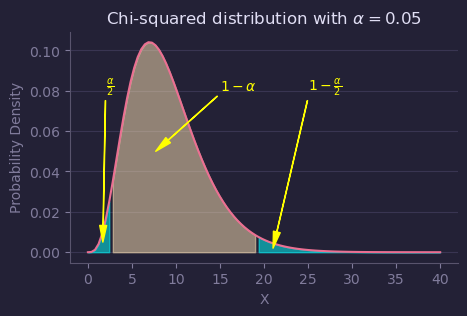

In [16]:
t = np.linspace(0, 40, 100)

fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(1,1,1)
ax.plot(t, chi2.pdf(t))

# region fill
for i in range(2):
    if i == 0:
        fill_range = t[np.where(t<=critical_values[i])]
    elif i == 1:
        fill_range = t[np.where(t>=critical_values[i])]
    ax.fill_between(fill_range, chi2.pdf(fill_range), color='cyan', alpha=0.5, label='Con')
    
z_range = t[np.where((t>critical_values[0])&(t<critical_values[1]))]   
ax.fill_between(z_range, chi2.pdf(z_range), color='moccasin', alpha=0.5)


# annotations
ax.annotate(r'$\frac{\alpha}{2}$', xy=(critical_values[0]-1, 0.005), xytext=(2, 0.08),color='yellow', arrowprops={'color':'yellow','width':0.2, 'headwidth': 5})
ax.annotate(r'$1-\frac{\alpha}{2}$', xy=(critical_values[1]+2, 0.002), xytext=(25, 0.08),color='yellow', arrowprops={'color':'yellow','width':0.2, 'headwidth': 5})
ax.annotate(r'$1-\alpha$', xy=(critical_values[0]+5, 0.05), xytext=(15, 0.08),color='yellow', arrowprops={'color':'yellow','width':0.2, 'headwidth': 5})

ax.set_xlabel('X')
ax.set_ylabel('Probability Density')
ax.set_title(r'Chi-squared distribution with $\alpha = 0.05$');